In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


In [3]:
df = pd.read_csv("taxi dataset.csv")


In [4]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']]) + pd.to_timedelta(df['hour_of_day'], unit='h')


In [5]:
ts_df = df.groupby('datetime')['total_amount'].sum().reset_index().sort_values('datetime')

scaler = MinMaxScaler()
ts_df['scaled'] = scaler.fit_transform(ts_df[['total_amount']])

def create_sequences(data, window_size=24):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i])
        y.append(data[i])
    return np.array(X), np.array(y)

X, y = create_sequences(ts_df['scaled'].values, window_size=24)


In [6]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
model.fit(X_train, y_train)

predictions = model.predict(X_test)

predicted_values = scaler.inverse_transform(predictions.reshape(-1, 1))
actual_values = scaler.inverse_transform(y_test.reshape(-1, 1))

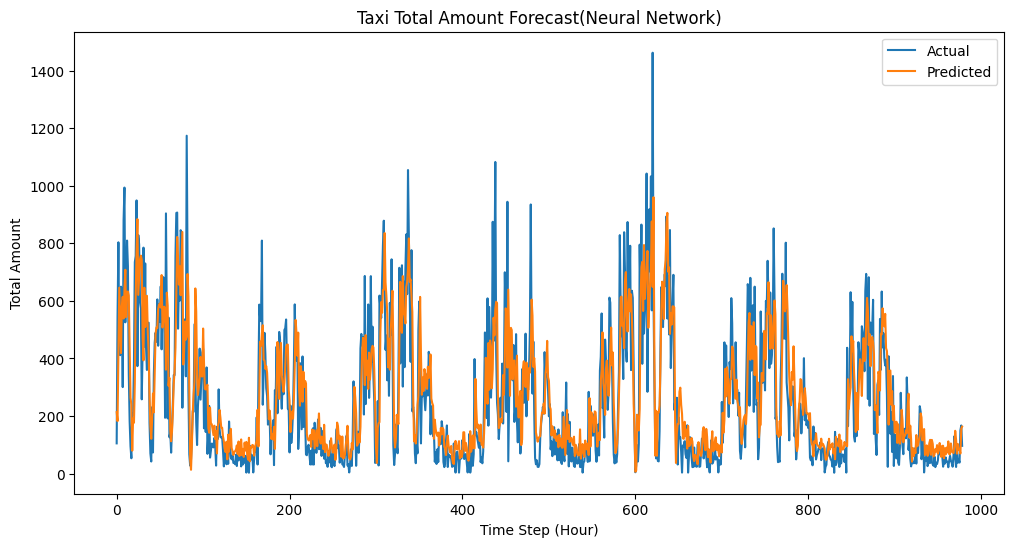

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(actual_values, label='Actual')
plt.plot(predicted_values, label='Predicted')
plt.title('Taxi Total Amount Forecast(Neural Network)')
plt.xlabel('Time Step (Hour)')
plt.ylabel('Total Amount')
plt.legend()
plt.show()